In [141]:
### for writers
# ratio of wins to losses
# distribution of current donor for wins and losses
# distribution of lifetime word count for wins and losses
# distribution of number of novels for wins and losses
# distribution of number of donations for wins and losses
# distribution of number of past wins for wins and losses
# distribution of max consecutive participation for wins and losses
# distribution of max consecutive donations for wins and losses
# distribution of max consecutive wins for wins and losses
# distribution of expected average final word count for wins and losses
# distribution of expected num submissions for wins and losses 
# distribution of expected consecutive submissions for wins and losses
# distribution of expected submission average for wins and losses
# distribution of expected daily average for wins and losses

### additional info for first week, first half, second half
# distribution of num submissions for wins and losses for all three time frames
# distribution of avg word count of submission for wins and losses for all three time frames

### correlations
# expected daily avg and expected submission avg
# num donations and num wins
# max consecutive participation and max consecutive wins 
# max consecutive donations and max consecutive wins
# expected num submissions and expected daily avg
# expected num submissions and expected submission avg

### for novels
# ratio of wins to losses
# number of wins and losses for each genre
# distribution final word count for each genre
# distribution daily avg for each genre

### cluster analysis

In [85]:
import pandas as pd
import numpy as np
from matplotlib.colors import ListedColormap

%matplotlib inline

In [38]:
writers = pd.read_csv("../clean data/user_summary_no2015.csv", index_col=0)

In [39]:
writers.columns

Index([u'Writer Name', u'Member Length', u'LifetimeWordCount', u'url', u'Age',
       u'Birthday', u'Favorite books or authors', u'Favorite noveling music',
       u'Hobbies', u'Location', u'Occupation', u'Primary Role',
       u'Sponsorship URL', u'Expected Final Word Count',
       u'Expected Daily Average', u'CURRENT WINNER', u'Current Donor', u'Wins',
       u'Donations', u'Participated', u'Consecutive Donor',
       u'Consecutive Wins', u'Consecutive Part', u'Part Years', u'Win Years',
       u'Donor Years', u'Num Novels', u'Expected Num Submissions',
       u'Expected Avg Submission', u'Expected Min Submission',
       u'Expected Min Day', u'Expected Max Submission', u'Expected Max Day',
       u'Expected Std Submissions', u'Expected Consec Subs', u'FW Total',
       u'FW Sub', u'FH Total', u'FH Sub', u'SH Total', u'SH Sub'],
      dtype='object')

In [40]:
writers.head()


,Writer Name,Member Length,LifetimeWordCount,url,Age,Birthday,Favorite books or authors,Favorite noveling music,Hobbies,Location,...,Expected Max Submission,Expected Max Day,Expected Std Submissions,Expected Consec Subs,FW Total,FW Sub,FH Total,FH Sub,SH Total,SH Sub
0,Nicaless,2,50919,http://nanowrimo.org/participants/nicaless,24,December 20,"Ursula Le Guin, J.K.","Classical, Musicals","Reading, Video Games, Blogging, Learning","San Francisco, CA",...,24935.0,28.000000,6235.712933,12.000000,6689,6,12486,9,11743,3
1,Rachel B. Moore,10,478090,http://nanowrimo.org/participants/rachel-b-moore,NaN,NaN,"2666, Unaccustomed Earth, Exit Music, Crazy Lo...","Belle and Sebastian, Elliott Smith, PJ Harvey,...","Reading, volunteering, knitting, listening to ...",San Francisco,...,3809.0,9.000000,1002.295167,6.800000,16722,7,24086,14,26517,14
2,abookishbabe,1,0,http://nanowrimo.org/participants/abookishbabe,NaN,April 2,"Colleen Hoover, Veronica Roth, Jennifer Niven,...",Tori Kelley,"Reading (DUH), Day dreaming, Going to Disneyla...","Sacramento, CA",...,NaN,NaN,NaN,NaN,28632,1,29299,2,0,0
3,alexabexis,11,475500,http://nanowrimo.org/participants/alexabexis,NaN,NaN,NaN,Three Goddesses playlist Florence + the Machin...,"drawing, reading, movies & TV shows, comics, p...",New York City,...,2325.0,8.545455,570.626795,8.090909,25360,7,38034,12,40766,9
4,AllYellowFlowers,3,30428,http://nanowrimo.org/participants/AllYellowFlo...,NaN,NaN,"Lolita, Jesus' Son, Ask the",the sound of the coffeemaker,cryptozoology,Allston,...,2054.5,4.500000,538.273315,21.000000,1800,5,5300,10,5700,9


## for writers

In [41]:
# ratio of wins to losses
winners = len(writers[writers['CURRENT WINNER'] == 1])
nonwinners = len(writers[writers['CURRENT WINNER'] == 0])
print "the ratio of winners to nonwinners is " + str( float(winners) / nonwinners)

the ratio of winners to nonwinners is 0.776595744681


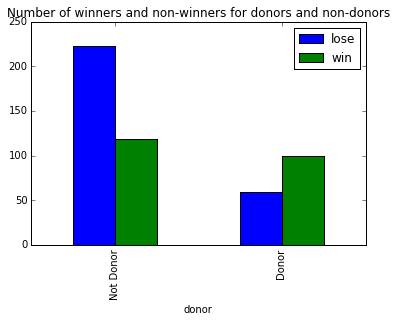

In [42]:
# distribution of current donor for wins and losses
winlose = writers.groupby(["CURRENT WINNER"])
donate_lose = sum(winlose['Current Donor'].get_group(0))
notdonate_lose = nonwinners - donate_lose
donate_win = sum(winlose['Current Donor'].get_group(1))
notdonate_win = winners - donate_win

df = pd.DataFrame(np.zeros((2,2)))
df.columns = ['lose','win']
df['lose'][0] = notdonate_lose
df['win'][0] = notdonate_win
df['lose'][1] = donate_lose
df['win'][1] = donate_win
df['donor'] = ['Not Donor', 'Donor']
df.plot(kind = 'bar', x='donor', y = ['lose', 'win'], title = "Number of winners and non-winners for donors and non-donors")

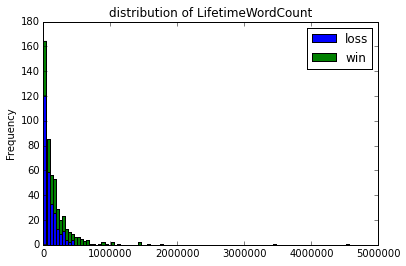

In [43]:
# distribution of lifetime word count for wins and losses
winlose = writers.groupby("CURRENT WINNER")
df = pd.DataFrame({'loss': winlose['LifetimeWordCount'].get_group(0), 'win': winlose['LifetimeWordCount'].get_group(1)})
df.plot(kind='hist', stacked=True, bins = 100, title = "distribution of LifetimeWordCount")



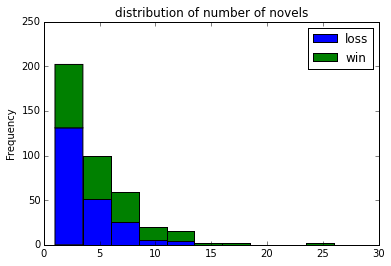

In [44]:
# distribution of number of novels for wins and losses
winlose = writers.groupby("CURRENT WINNER")
df = pd.DataFrame({'loss': winlose['Num Novels'].get_group(0), 'win': winlose['Num Novels'].get_group(1)})
df.plot(kind='hist', stacked=True, title = "distribution of number of novels")

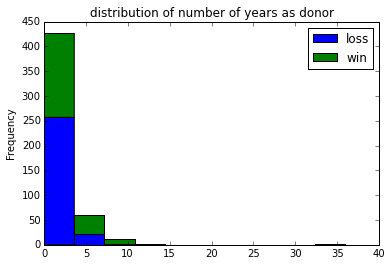

In [45]:
# distribution of number of donations for wins and losses
winlose = writers.groupby("CURRENT WINNER")
df = pd.DataFrame({'loss': winlose['Donations'].get_group(0), 'win': winlose['Donations'].get_group(1)})
df.plot(kind='hist', stacked=True, title = "distribution of number of years as donor")

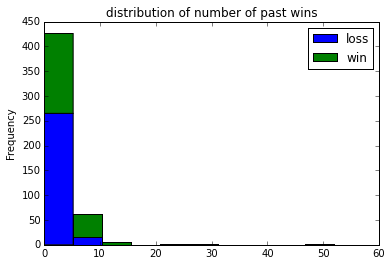

In [46]:
# distribution of number of past wins for wins and losses
winlose = writers.groupby("CURRENT WINNER")
df = pd.DataFrame({'loss': winlose['Wins'].get_group(0), 'win': winlose['Wins'].get_group(1)})
df.plot(kind='hist', stacked=True, title = "distribution of number of past wins")

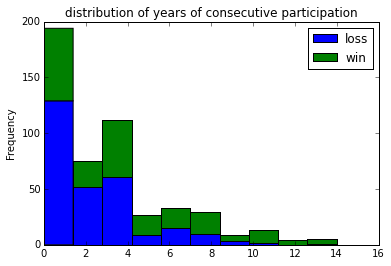

In [47]:
# distribution of max consecutive participation for wins and losses
writers.columns
winlose = writers.groupby("CURRENT WINNER")
df = pd.DataFrame({'loss': winlose['Consecutive Part'].get_group(0), 'win': winlose['Consecutive Part'].get_group(1)})
df.plot(kind='hist', stacked=True, title = "distribution of years of consecutive participation")

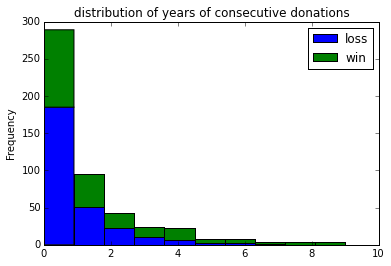

In [48]:
# distribution of max consecutive donations for wins and losses
winlose = writers.groupby("CURRENT WINNER")
df = pd.DataFrame({'loss': winlose['Consecutive Donor'].get_group(0), 'win': winlose['Consecutive Donor'].get_group(1)})
df.plot(kind='hist', stacked=True, title = "distribution of years of consecutive donations")

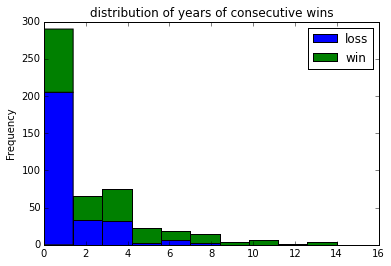

In [49]:
# distribution of max consecutive wins for wins and losses
df = pd.DataFrame({'loss': winlose['Consecutive Wins'].get_group(0), 'win': winlose['Consecutive Wins'].get_group(1)})
df.plot(kind='hist', stacked=True, title = "distribution of years of consecutive wins")

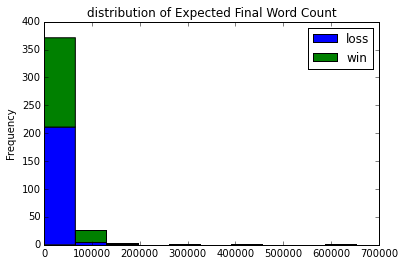

In [50]:
# distribution of expected final word count for wins and losses
df = pd.DataFrame({'loss': winlose['Expected Final Word Count'].get_group(0), 'win': winlose['Expected Final Word Count'].get_group(1)})
df.plot(kind='hist', stacked=True, title = "distribution of Expected Final Word Count")

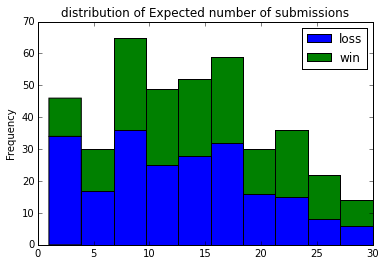

In [51]:
# distribution of expected num submissions for wins and losses 

df = pd.DataFrame({'loss': winlose['Expected Num Submissions'].get_group(0), 'win': winlose['Expected Num Submissions'].get_group(1)})
df.plot(kind='hist', stacked=True, title = "distribution of Expected number of submissions")

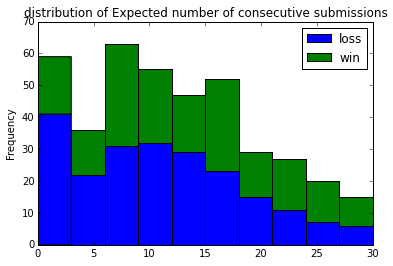

In [52]:
# distribution of expected consecutive submissions for wins and losses
df = pd.DataFrame({'loss': winlose['Expected Consec Subs'].get_group(0), 'win': winlose['Expected Consec Subs'].get_group(1)})
df.plot(kind='hist', stacked=True, title = "distribution of Expected number of consecutive submissions")

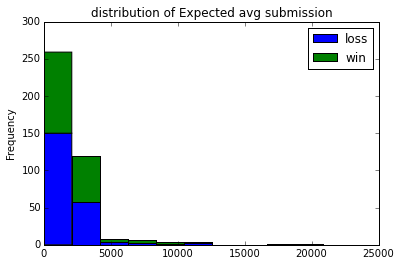

In [53]:
# distribution of expected submission average for wins and losses
winlose = writers.groupby("CURRENT WINNER")
df = pd.DataFrame({'loss': winlose['Expected Avg Submission'].get_group(0), 'win': winlose['Expected Avg Submission'].get_group(1)})
df.plot(kind='hist', stacked=True, title = "distribution of Expected avg submission")

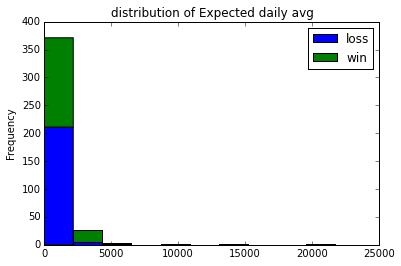

In [54]:
# distribution of expected daily average for wins and losses
winlose = writers.groupby("CURRENT WINNER")
df = pd.DataFrame({'loss': winlose['Expected Daily Average'].get_group(0), 'win': winlose['Expected Daily Average'].get_group(1)})
df.plot(kind='hist', stacked=True, title = "distribution of Expected daily avg")

## writers in first week of contest, first half of contest, and second half of contest

In [55]:
# distribution of num submissions for wins and losses for all three time frames

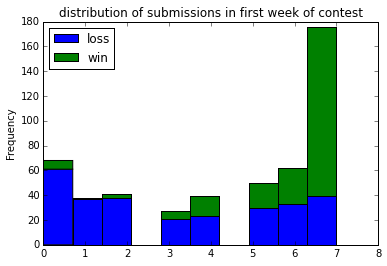

In [56]:
winlose = writers.groupby("CURRENT WINNER")
df = pd.DataFrame({'loss': winlose['FW Sub'].get_group(0), 'win': winlose['FW Sub'].get_group(1)})
df.plot(kind='hist', stacked=True, title = "distribution of submissions in first week of contest")

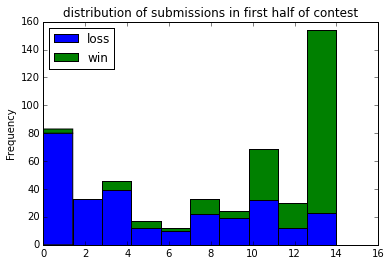

In [57]:
winlose = writers.groupby("CURRENT WINNER")
df = pd.DataFrame({'loss': winlose['FH Sub'].get_group(0), 'win': winlose['FH Sub'].get_group(1)})
df.plot(kind='hist', stacked=True, title = "distribution of submissions in first half of contest")

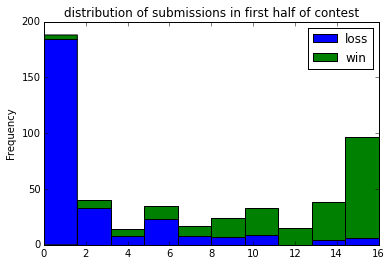

In [59]:
winlose = writers.groupby("CURRENT WINNER")
df = pd.DataFrame({'loss': winlose['SH Sub'].get_group(0), 'win': winlose['SH Sub'].get_group(1)})
df.plot(kind='hist', stacked=True, title = "distribution of submissions in second half of contest")

In [69]:
# distribution of avg word count of submission for wins and losses for all three time frames

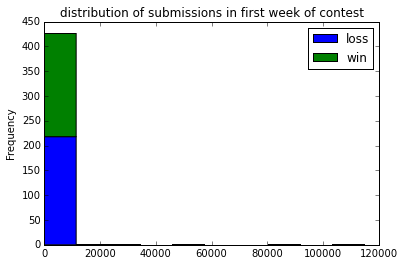

In [66]:
winlose = writers
winlose['Avg Sub'] = winlose['FW Total'] / winlose['FW Sub']
winlose = winlose.groupby("CURRENT WINNER")

df = pd.DataFrame({'loss': winlose['Avg Sub'].get_group(0), 'win': winlose['Avg Sub'].get_group(1)})
df.plot(kind='hist', stacked=True, title = "distribution of avg submission in first week of contest")

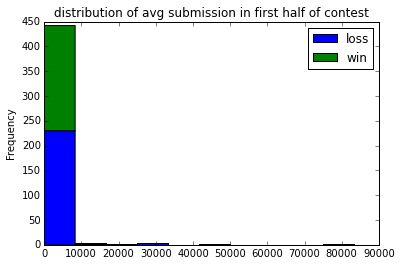

In [70]:
winlose = writers
winlose['Avg Sub'] = winlose['FH Total'] / winlose['FH Sub']
winlose = winlose.groupby("CURRENT WINNER")

df = pd.DataFrame({'loss': winlose['Avg Sub'].get_group(0), 'win': winlose['Avg Sub'].get_group(1)})
df.plot(kind='hist', stacked=True, title = "distribution of avg submission in first half of contest")

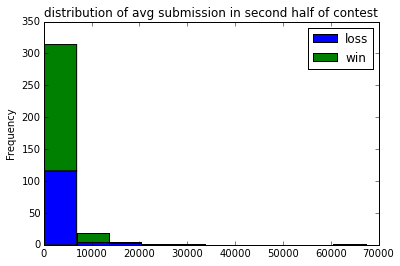

In [71]:
winlose = writers
winlose['Avg Sub'] = winlose['SH Total'] / winlose['SH Sub']
winlose = winlose.groupby("CURRENT WINNER")

df = pd.DataFrame({'loss': winlose['Avg Sub'].get_group(0), 'win': winlose['Avg Sub'].get_group(1)})
df.plot(kind='hist', stacked=True, title = "distribution of avg submission in second half of contest")

### Correlations

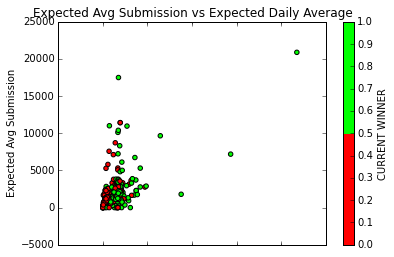

In [86]:
# expected daily avg and expected submission avg
cmap_bold = ListedColormap(['#FF0000', '#00FF00'])
writers.plot(kind='scatter', x='Expected Daily Average', y='Expected Avg Submission', c='CURRENT WINNER', colormap=cmap_bold, title = "Expected Avg Submission vs Expected Daily Average")

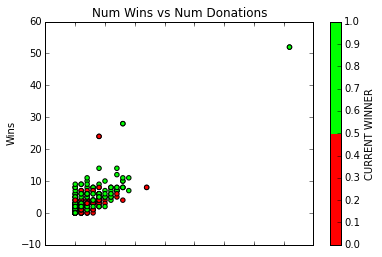

In [87]:
# num donations and num wins
writers.plot(kind='scatter', x='Donations', y='Wins', c='CURRENT WINNER', colormap=cmap_bold, title = "Num Wins vs Num Donations")


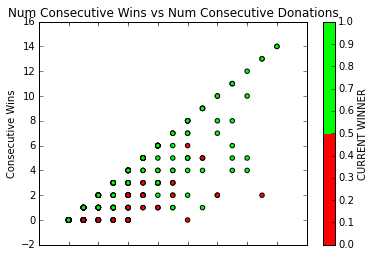

In [88]:
# max consecutive participation and max consecutive wins 
writers.plot(kind='scatter', x='Consecutive Part', y='Consecutive Wins', c='CURRENT WINNER', colormap=cmap_bold, title = "Num Consecutive Wins vs Num Consecutive Participation")


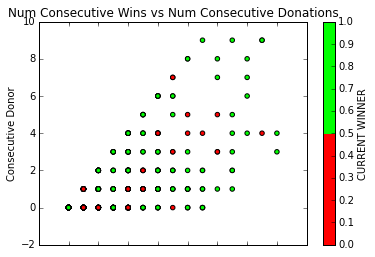

In [89]:
# max consecutive donations and max consecutive wins
writers.plot(kind='scatter', x='Consecutive Part', y='Consecutive Donor', c='CURRENT WINNER', colormap=cmap_bold, title = "Num Consecutive Wins vs Num Consecutive Donations")


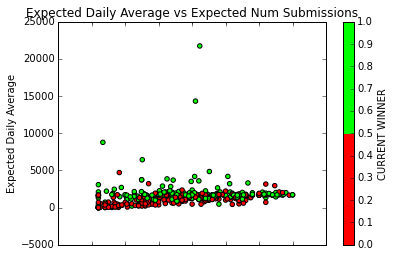

In [91]:
# expected num submissions and expected daily avg
writers.plot(kind='scatter', x='Expected Num Submissions', y='Expected Daily Average', c='CURRENT WINNER', colormap=cmap_bold, title = "Expected Daily Average vs Expected Num Submissions")


__so far possible clusters seem more apparent here__

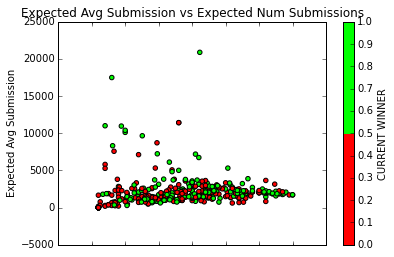

In [92]:
# expected num submissions and expected submission avg
writers.plot(kind='scatter', x='Expected Num Submissions', y='Expected Avg Submission', c='CURRENT WINNER', colormap=cmap_bold, title = "Expected Avg Submission vs Expected Num Submissions")


### for novels

In [131]:
novels = pd.read_csv("../clean data/novel_data.csv", index_col=0)
novels.head()


,Writer Name,Novel Name,Genre,Final Word Count,Daily Average,Winner,Synopses,url,Novel Date
0,Nicaless,Novel: Lauren's Birthday,Genre: Young Adult,24229,807,0,\n<p></p>\n,http://nanowrimo.org/participants/nicaless/nov...,November 2015
1,Nicaless,Novel: A Mystery in the Kingdom of Aermon,Genre: Fantasy,50919,"1,697",1,\n<p>Hitoshi is appointed the youngest Judge a...,http://nanowrimo.org/participants/nicaless/nov...,November 2014
2,Rachel B. Moore,Novel: Finding Fortunato,Genre: Literary,50603,"1,686",1,\n<p>Sam and Anna Gold and their newly adoptiv...,http://nanowrimo.org/participants/rachel-b-moo...,November 2015
3,Rachel B. Moore,Novel: The Residency,Genre: Literary,50425,"1,680",1,\n<p>It's every writer's dream - an all-expens...,http://nanowrimo.org/participants/rachel-b-moo...,November 2014
4,Rachel B. Moore,Novel: The Jew From Fortunato,Genre: Literary Fiction,41447,"1,381",0,\n<p>20-something Andre Levinsky is a fish out...,http://nanowrimo.org/participants/rachel-b-moo...,November 2013


In [133]:
novel_dates = pd.read_csv("../rawdata/novel_names_urls_dates.csv")
novel_dates.head()
novels['Novel Date'] = novel_dates['Novel Date']
novels.to_csv("../clean data/novel_data.csv")
novels.head()

,Writer Name,Novel Name,Genre,Final Word Count,Daily Average,Winner,Synopses,url,Novel Date
0,Nicaless,Novel: Lauren's Birthday,Genre: Young Adult,24229,807,0,\n<p></p>\n,http://nanowrimo.org/participants/nicaless/nov...,November 2015
1,Nicaless,Novel: A Mystery in the Kingdom of Aermon,Genre: Fantasy,50919,"1,697",1,\n<p>Hitoshi is appointed the youngest Judge a...,http://nanowrimo.org/participants/nicaless/nov...,November 2014
2,Rachel B. Moore,Novel: Finding Fortunato,Genre: Literary,50603,"1,686",1,\n<p>Sam and Anna Gold and their newly adoptiv...,http://nanowrimo.org/participants/rachel-b-moo...,November 2015
3,Rachel B. Moore,Novel: The Residency,Genre: Literary,50425,"1,680",1,\n<p>It's every writer's dream - an all-expens...,http://nanowrimo.org/participants/rachel-b-moo...,November 2014
4,Rachel B. Moore,Novel: The Jew From Fortunato,Genre: Literary Fiction,41447,"1,381",0,\n<p>20-something Andre Levinsky is a fish out...,http://nanowrimo.org/participants/rachel-b-moo...,November 2013


In [135]:
# ratio of wins to losses

winners = len(novels[novels['Winner'] == 1])
nonwinners = len(novels[novels['Winner'] == 0])
print "the total number of novels written is " + str( winners + nonwinners)
print str(winners) + " are winners"
print str(nonwinners) + " are not winners"
print "the ratio of winners to nonwinners is " + str( float(winners) / nonwinners)


the total number of novels written is 2123
1333 are winners
790 are not winners
the ratio of winners to nonwinners is 1.68734177215


__interesting that there are more winning novels than nonwinners.  this makes sense because writers who write more novels are more likely to have their novels reach the 50,000 word goal__

In [142]:
# text distribution on genre
from sklearn.feature_extraction.text import CountVectorizer

In [147]:
genres = novels['Genre']
vect = CountVectorizer(decode_error = 'ignore')
vect.fit(genres)
vect.get_feature_names()

genre_df = pd.DataFrame(vect.transform(genres).toarray(), columns=vect.get_feature_names())
genre_df.head()

,above,adult,adventure,adventurous,age,all,alternative,analysis,and,angst,...,trick,urban,western,with,women,ya,young,your,youth,ça
0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [138]:
# number of wins and losses for each genre
